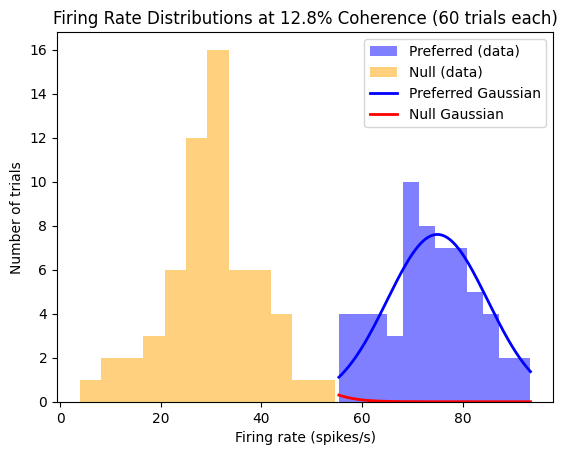

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# === Parameters (illustrative, replace with actual µ and σ if available) ===
mu_pref, sigma_pref = 75, 10
mu_null, sigma_null = 30, 10
n_trials = 60

# Simulate 60 trials each
pref_samples = np.random.normal(mu_pref, sigma_pref, n_trials)
null_samples = np.random.normal(mu_null, sigma_null, n_trials)

# Histogram bins
nbins = 12
counts_pref, edges = np.histogram(pref_samples, bins=nbins, density=False)
counts_null, _ = np.histogram(null_samples, bins=nbins, density=False)
bin_width = edges[1] - edges[0]
xaxis = np.linspace(edges[0], edges[-1], 200)

# Plot histograms (raw counts on y-axis)
plt.hist(pref_samples, bins=nbins, alpha=0.5, label="Preferred (data)", color="blue")
plt.hist(null_samples, bins=nbins, alpha=0.5, label="Null (data)", color="orange")

# Overlay Gaussian fits scaled to counts
plt.plot(xaxis,
         norm.pdf(xaxis, mu_pref, sigma_pref) * n_trials * bin_width,
         "b-", linewidth=2, label="Preferred Gaussian")
plt.plot(xaxis,
         norm.pdf(xaxis, mu_null, sigma_null) * n_trials * bin_width,
         "r-", linewidth=2, label="Null Gaussian")

plt.title("Firing Rate Distributions at 12.8% Coherence (60 trials each)")
plt.xlabel("Firing rate (spikes/s)")
plt.ylabel("Number of trials")
plt.legend()
plt.show()




This is based on the paper: Britten, K H et al. (1992) “The analysis of visual motion: a comparison of neuronal and psychophysical performance.” J neurosci
In the figure I am trying to replicate they were measuring spike rate from two populations of neurons in V5 of the primate while responding to moving dots. one population (purple) had a preferred motion direction in which 12.8% of the dots were moving. The other population (orange) did not have dots moving in its preferred motion direction. There is some overlap because the "purple" population is still only responding to 12.8% of the dots but spike rates for both follow a Gaussian curve. number of trials was stated in the figure legend (60 trials) and the mean and variance was estimated by looking at the histogram in the paper